In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

<center><h1> SAU SKRIPTA ZA ISPITNA PITANJA 2018/2019</h1></center>

## 1. Osnovno kolo SAU

Osnovno kolo SAU se predstavlja dijagramom:

 <img src="images/povratna_sprega.png" > 

Što se dalje pretvara:
<img src="images/povratna_sprega_1.png" > 

I konačno imamo:
<img src="images/povratna_sprega_2.png" > 

<b>Regulator</b> - njegov zadatak jeste da na osnovu izmerene greške <b>e</b> i željenog ulaza <b>r</b> prosledi naredbu aktuatoru koju on treba da izvrši preko upravljačkog signala

<b>Aktuator</b> - pošto regulator izdaje relativno slabe signale, aktuator je tu da te slabe signale (komande) pretvori u fizički značajne signale, <b>u</b>, koje mogu uticati na sistem

<b>Sistem</b> - objekat/proces koji posmatramo i na koji želimo da utičemo i njegov izlaz je <b>y</b>

<b>Senzor</b> - merni instrument pomoću kojega očitavamo izlaz iz sistema, naravno ovaj instrument nije savršen, pa ni signal koji izlazi iz njega, te uvek postoji greška. Izlazni signal senzora je <b>ym</b>

<b>Sistem u širem smislu </b>- ceo sistem posmatran od strane regulatora, u njega su spakovani aktuator, posmatrani sistem i senzor

<b>***AKTUATOR SE SMATRA U OVOJ SLICI DA JE DEO REGULATORA KOJI PRILIKOM TRANSFORMACIJE U TRECU SLIKU SE ODVAJA OD REGULATORA I "PAKUJE" U "SISTEM U SIREM SMISLU" BLOK</b>

## 2. Laplasova transformacija. Definicija i osobine. Laplasova transformacija karakterističnih pobudnih signala

### Definicija Laplasove transformacije:
$$\mathscr{L}\{f(t)\} = \int_{0}^{\infty}e^{-st}f(t)dt = F(s)$$


### Osobine Laplasove transformacije:

  * <h5> 1. Linearnost:</h5>
  >> $$\mathscr{L}\{Af(t) + Bg(t)\} = AF(s) + BF(s)$$
  * <h5> 2. Laplasova transformacija izvoda:</h5>
  >> $$\mathscr{L}\{f'(t)\} = \int_{0}^{\infty}e^{-st}f'(t)dt$$
  >> parcijalnom integracijom za: $$du = -se^{-st}dt$$ $$v = f(t)$$
  >> dobijamo: $$[e^{-st}f(t)]\Big|_{0}^{\infty} - \int_{0}^{\infty}-se^{-st}f(t)dt$$
  >> što je: $$0 - f(0) + sF(s) = sF(s) - f(0) \hspace{1cm}(1)$$
  
  >> pa za drugi izvod sledi:
  >> $$\mathscr{L}\{f''(t)\} = \int_{0}^{\infty}e^{-st}f''(t)dt = \int_{0}^{\infty}e^{-st}(f'(t))'dt$$
  >> $$(1) => s\mathscr{L}\{f'(t)\} - f'(0) = s[sF(s) - f(0)] - f'(0) = s^2F(s) - sf(0) - f'(0)$$
  
  >> te za n-ti izvod sledi:
  >> $$\mathscr{L}\{f^{(n)}(t)\} = \sum_{i=1}^{n}s^{n-i}f^{(i-1)}(0)$$
  
  * <h5> 3. Laplasova transformacija integrala:</h5>
  >> $$\mathscr{L}\{\int_{0}^{t}f(\tau)\} = \int_{0}^{\infty}e^{-st}(\int_{0}^{t}f(\tau)d\tau)dt$$ 
  
  >> primenom parcijalne integracije dobijamo:
  $$ \int_{0}^{t}f(\tau)d\tau \frac{e^{-st}}{-s}\Big|_{0}^{\infty} - \int_{0}^{\infty}f(t)\frac{e^{-st}}{-s}dt = 0-0 + \frac{1}{s}\int_{0}^{\infty}f(t)e^{-st}dt = \frac{1}{s}F(s) $$
  
  * <h5> 4. Množenje stepenom funkcijom:</h5>
  >> $$ dF(s) = \int_{0}^{\infty}f(t)e^{-st}dt \hspace{1cm}\Big/\frac{1}{ds} $$
  >> $$ \frac{dF(s)}{ds} = \int_{0}^{\infty}\frac{\partial e^{-st}}{\partial s}f(t)dt = \int_{0}^{\infty}(-te^{-st})f(t)dt = -\int_{0}^{\infty}e^{-st}tf(t)dt = -\mathscr{L}\{tf(t)\}$$
  >> $$ => \mathscr{L}\{tf(t)\} = -\frac{dF(s)}{ds}$$
  
  * <h5> 5. Vremensko kašnjenje:</h5>
  >> $$ \mathscr{L}\{f(t-\tau\} = \int_{0}^{\infty}f(u)e^{-s(u + \tau)}du \hspace{1cm}(3)$$
  >> gde je: $$ u = t - \tau $$
  
  >> $$ (3) = e^{-s\tau}\int_{0}^{\infty}f(u)e^{-su}du = e^{-s\tau}F(s) $$
  
  * <h5> 6. Pomeranje u kompleksnom domenu:</h5>
  >> $$ \mathscr{L}\{e^{-at}f(t)\} = \int_{0}^{\infty}f(t)e^{-t(s+a)}dt = F(s+a)$$

  * <h5> 7. Laplasova transformacija konvolucije:</h5>
  >> $$ (f*g)(t) \equiv \int_{0}^{t}f(t-\tau)g(\tau)d\tau = \int_{0}^{t}f(\tau)g(t-\tau)d\tau $$
  
  >> $$ \mathscr{L}\{(f*g)(t)\} = \int_{0}^{\infty}(f*g)(t)e^{-st}dt\\ = \int_{0}^{\infty}\int_{0}^{t}f(t-\tau)g(\tau)e^{-st}d\tau dt = \int_{0}^{\infty}\int_{\tau}^{\infty}f(t-\tau)g(\tau)e^{-st}dtd\tau \hspace{1cm}(4)$$
  >> $$ v = t-\tau i dv=dt$$
  >> $$ (4) = \int_{0}^{\infty}\int_{0}^{\infty}f(v)g(\tau)e^{-s(v+\tau)}dvd\tau = \int_{0}^{\infty}f(v)e^{-sv}dv\int_{0}^{\infty}g(\tau)e^{-s\tau}d\tau = F(S)G(S) $$
  
  * <h5> 8. Prva granična teorema:</h5>
  >> $$ \lim_{t\to 0}f(t) = \lim_{s\to \infty}sF(s) $$
  
  * <h5> 9. Druga granična teorema: </h5>
  >> $$ \lim_{t\to\infty}f(t) = \lim_{s\to 0}sF(s)$$
  
### Laplasova transformacija nekih karakterističnih signala:
  * <h5> 1. Transformacija jedinične pobude h(t):</h5>
  >> Jedinična pobuda, tj. heaviside signal je definisan kao
  $$
  h(t) =
  \begin{cases}
  1 , & t \geq 0 \\
  0, & t < 0
  \end{cases}
  $$
  
  

<IPython.core.display.Javascript object>


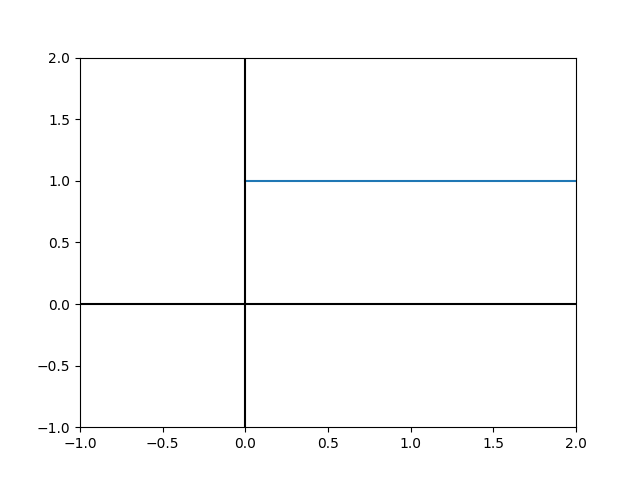

In [41]:
{
    "tags": [
        "hide_input",
    ]
}
y = [1, 1];
x = [0, 2];
plt.plot(x, y);
plt.ylim(-1, 2);
plt.xlim(-1, 2);
plt.axhline(y=0, color='k');
plt.axvline(x=0, color='k');

 >> $$ \mathscr{L}\{h(t)\} = \int_{0}^{\infty}h(t)e^{-st}dt = \int_{0}^{\infty}e^{-st}dt = \frac{e^{-st}}{-s}\big|_{0}^{\infty} = \frac{e^{-s\infty}}{-s} - \frac{e^{-0t}}{-s} = 0 - (-\frac{1}{s}) =  \frac{1}{s}$$
  
  * <h5> 2. Transformacija impulsne pobude:</h5>
  >> $$ \mathscr{L}\{\delta(t)\} = 1 $$